In [53]:
# Install tensorflow package
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [3]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

# normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

X_train=X_train[...,tf.newaxis]
X_test=X_test[...,tf.newaxis]

print(f"Train shape: {X_train.shape} , Test shape: {X_test.shape}")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step
Train shape: (60000, 28, 28, 1) , Test shape: (10000, 28, 28, 1)


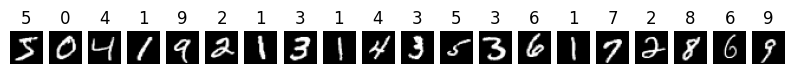

In [29]:
# plot first 20 images
plt.figure(figsize=(10,2))
for i in range(20):
    plt.subplot(1,20,i+1)
    plt.imshow(X_train[i].squeeze(),cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [18]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history=model.fit(X_train,y_train,epochs=5,
                  validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8986 - loss: 0.3177 - val_accuracy: 0.9841 - val_loss: 0.0471
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9839 - loss: 0.0490 - val_accuracy: 0.9905 - val_loss: 0.0298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9892 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9887 - val_loss: 0.0346


In [21]:
test_loss,test_acc=model.evaluate(X_test,y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:2f}% ")

313/313 - 2s - 8ms/step - accuracy: 0.9887 - loss: 0.0346
Test Accuracy: 98.869997% 


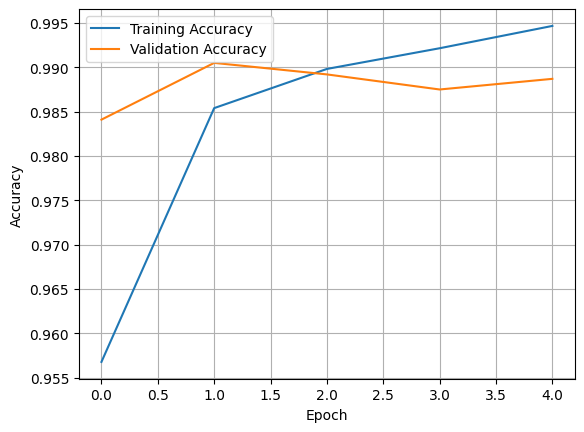

In [32]:
# plot Accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


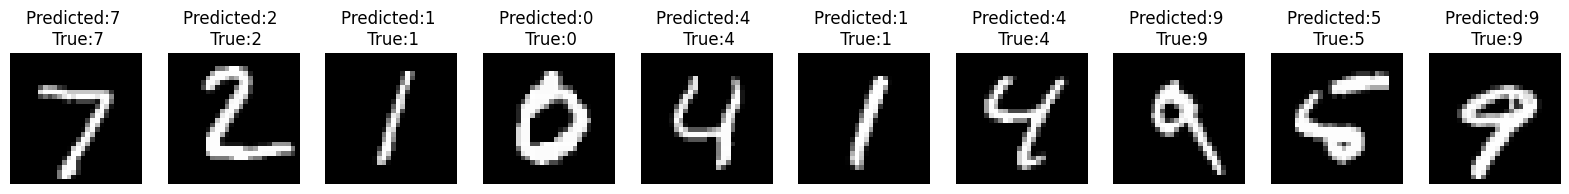

In [43]:
# Make predictions on test data
predictions=model.predict(X_test[:20])

plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"Predicted:{tf.argmax(predictions[i]).numpy()} \n True:{y_test[i]}")
    plt.axis('off')
plt.show()

In [51]:
model.save('mnist_cnn_model.h5')

loaded_model=tf.keras,models.load_model('mnist_cnn_model.h5')